# Mushroom_Dataset

# 1. Content

1. This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms. 
2. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. 
3. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("F:\PGDDS\PGD_Data_Science\csv_data\mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [5]:
df['class'].replace({'p' : 0, 'e':1}, inplace = True)

In [6]:
df['class']

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int64

In [7]:
X = df.drop(['class'], axis=1)
y = df['class']

In [8]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
l = []

In [9]:
X = pd.get_dummies(X, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'], drop_first=True)

In [10]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 95 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   cap-shape_c                 8124 non-null   uint8
 1   cap-shape_f                 8124 non-null   uint8
 2   cap-shape_k                 8124 non-null   uint8
 3   cap-shape_s                 8124 non-null   uint8
 4   cap-shape_x                 8124 non-null   uint8
 5   cap-surface_g               8124 non-null   uint8
 6   cap-surface_s               8124 non-null   uint8
 7   cap-surface_y               8124 non-null   uint8
 8   cap-color_c                 8124 non-null   uint8
 9   cap-color_e                 8124 non-null   uint8
 10  cap-color_g                 8124 non-null   uint8
 11  cap-color_n                 8124 non-null   uint8
 12  cap-color_p                 8124 non-null   uint8
 13  cap-color_r                 8124 non-null   uint8
 14  cap-colo

In [12]:
X.isnull().sum()

cap-shape_c    0
cap-shape_f    0
cap-shape_k    0
cap-shape_s    0
cap-shape_x    0
              ..
habitat_l      0
habitat_m      0
habitat_p      0
habitat_u      0
habitat_w      0
Length: 95, dtype: int64

In [13]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [15]:
y.unique()

array([0, 1], dtype=int64)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
X_train.shape

(6499, 95)

In [18]:
X_test.shape

(1625, 95)

In [26]:
# model = DecisionTreeClassifier(criterion='gini', max_depth=1)
AdaBoost = AdaBoostClassifier(base_estimator=model, n_estimators=400, learning_rate=1)

In [27]:
y_test.shape

(1625,)

In [28]:
boostmodel = AdaBoost.fit(X_train, y_train)

In [29]:
#Evaluate the accuracy of the model
y_pred = boostmodel.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
boostmodel.score(X_test, y_test)

1.0

In [31]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [32]:
cm =confusion_matrix(y_test, y_pred)

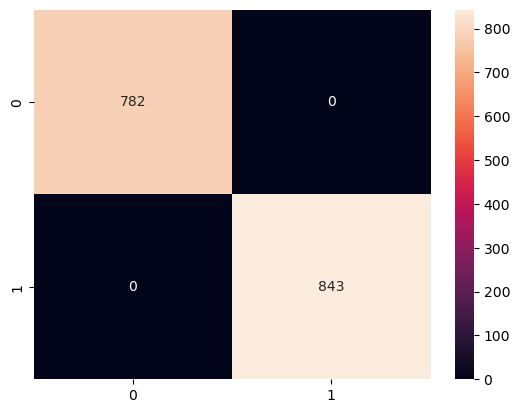

In [35]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()